# Classify hand that shows Rock | Paper | Scissors

This project are written in Google Colab

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

BASE_DIR =  '/content'

In [ ]:
train_dir = os.path.join(BASE_DIR, 'rockpaperscissors')

In [ ]:
os.listdir(train_dir)

['.ipynb_checkpoints', 'scissors', 'rock', 'paper']

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.1)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        subset='validation')

Found 1566 images belonging to 4 classes.
Found 172 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(
    train_generator,
    batch_size=32,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch=25,
    validation_steps=5
)

Epoch 1/10
25/25 [==============================] - 7s 268ms/step - loss: 1.2305 - accuracy: 0.3800 - val_loss: 1.2062 - val_accuracy: 0.3500
Epoch 2/10
25/25 [==============================] - 7s 261ms/step - loss: 1.0481 - accuracy: 0.4400 - val_loss: 1.0943 - val_accuracy: 0.4000
Epoch 3/10
25/25 [==============================] - 6s 259ms/step - loss: 1.0050 - accuracy: 0.5700 - val_loss: 0.9561 - val_accuracy: 0.5000
Epoch 4/10
25/25 [==============================] - 7s 263ms/step - loss: 0.7962 - accuracy: 0.7500 - val_loss: 0.5198 - val_accuracy: 0.8500
Epoch 5/10
25/25 [==============================] - 7s 260ms/step - loss: 0.6774 - accuracy: 0.7400 - val_loss: 0.5424 - val_accuracy: 0.8500
Epoch 6/10
25/25 [==============================] - 7s 261ms/step - loss: 0.6189 - accuracy: 0.7700 - val_loss: 0.4574 - val_accuracy: 0.7000
Epoch 7/10
25/25 [==============================] - 6s 256ms/step - loss: 0.5167 - accuracy: 0.7959 - val_loss: 0.3815 - val_accuracy: 0.8000
Epoch 

Saving 0bioBZYFCXqJIulm.png to 0bioBZYFCXqJIulm.png
0bioBZYFCXqJIulm.png
rock


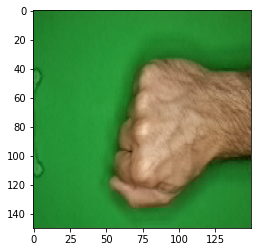

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
  
uploaded = files.upload()
  
for fn in uploaded.keys():
  
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][1]==1:
    print('paper')
  elif classes[0][2]==1:
    print('rock')
  elif classes[0][3]==1:
    print('scissors')